In [1]:
#Kernel Python 3.9.13

#get oauth token
#https://twitchapps.com/tmi/

#This script only applies to twitch live chats


/Users/mnemo/Desktop/twitch


In [17]:

from twitch_listener import listener
import os
import time
import pandas as pd
import shutil



def delete_log():
    os.chdir('/Users/mnemo/Desktop/twitch')
    #now delete every file that end with .log
    for file in os.listdir():
        if file.endswith(".log"):
            os.remove(file)




def scrape():
    try:
        #change the directory to /Users/YOUR_USERNAME/Desktop/YOUR_PREFERRED_FOLDER
        os.chdir('/Users/mnemo/Desktop/twitch')


        # Connect to Twitch
        #......('YOUR_TWITCH_USERNAME', 'YOUR_TWITCH_OAUTH_TOKEN', 'CLIENT_ID')
        bot = listener.connect_twitch('maxmnemo', 
                                     'oauth:yvupb309of8542tta14h5b13de81ew', 
                                     '6wk5itntbput1tddde1lo7o1zuym20')

        # List of channels to connect to
        # []
        channels_to_listen_to = ['roozworld', 'orangemorange', 'mckytv', 'xthesolutiontv', 'niklaswilson', 'painlivestream', 'eliasn97', 'trymacs', 'skylinetvlive', 'bonjwa', 'honeypuu', 'realmoji']

        #'trymacs', 'vieafnin', 'rocketbeanstv', 'orangemorange', 'gronkh', 'honeypuu', 'krissi', 'abugoku9999', 'dekarldent', 'xthesolutiontv', 'niklaswilson', 'denzelzockt','fler'

        # Scrape live chat data into raw log files. (Duration is seconds)
        bot.listen(channels_to_listen_to, duration = 4000) 

        # Convert log files into .CSV format
        bot.parse_logs(timestamp = True)

        # Generate adjacency matrix
        #bot.adj_matrix(weighted = False, matrix_name = "streamer_network.csv")
    except:
        
        print("error")
        delete_log()
        time.sleep(3)








def remove_small_files():
    os.chdir('/Users/mnemo/Desktop/twitch')
    for file in os.listdir():
        if file.endswith(".csv"):
            if os.path.getsize(file) < 10000:
                os.remove(file)




def add_date():
    os.chdir('/Users/mnemo/Desktop/twitch')          

    today = time.strftime("%d-%m-%Y")
    yesterday = time.strftime("%d-%m-%Y", time.localtime(time.time() - 86400))

    #append the date today to every file before the dot
    for file in os.listdir():
        if file.endswith(".csv"):
            os.rename(file, file.replace(".csv", f"_{today}.csv"))


#def add_column(file_name, string):
#   with open(file_name, 'r') as f:
#       reader = csv.reader(f)
#       data = list(reader)
#   with open(file_name, 'w') as f:
#       writer = csv.writer(f)
#       #add a additional column with the title 'channel'
#       for row in data:
#           row.append(string)
#           writer.writerow(row)



#
#
#def add_streamer_column():
#
#    #the streamer name is everything before the first underscore
#    os.chdir('/Users/mnemo/Desktop/twitch')
#    streamer_names = []
#    for file in os.listdir():
#        if file.endswith(".csv"):
#            streamer_names.append(file.split('_')[0])
#
#    #add a column with the streamer name
#    for file in os.listdir():
#        if file.endswith(".csv"):
#            add_column(file, streamer_names)
#



def move_file():
      os.chdir('/Users/mnemo/Desktop/twitch') 

      #move all files in the directory to a new folder called /Users/mnemo/Desktop/Twitch-chats
      #move the files NOT the folder

      for file in os.listdir():
            if file.endswith(".csv"):
                shutil.move(file, '/Users/mnemo/Desktop/Twitch-chats')
           













def main():
    scrape()
    time.sleep(2)
    delete_log()
    time.sleep(2)
    remove_small_files()
    time.sleep(2)
    add_date()
    time.sleep(2)
    move_file()


main()





error


In [3]:
import csv
import re
import matplotlib.pyplot as plt
import datetime


#Enter the name of the streamer from the URL
streamer = 'orangemorange'


laughs = []
timestamps = []
all_messages = []
authors = []



def remove_time(string):
    return string[:8]


today = datetime.datetime.now().strftime("%Y-%m-%d")


with open(f'{streamer}.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        
        try:
            #filter messages
            if row[0].startswith('!') or 'https://' in row[0] or 'http://' in row[0] or row[1].startswith('Streamlabs') or row[1].startswith('streamlabs') or 'bot' in row[1]:
                continue

            #only add unique authors
            if row[1] not in authors:
                authors.append(row[1])
                
                
            #replace 2022-05-31 with a space to extract timestamp
            if today in row[2]:
                row[2] = row[2].replace(today, '')
                row[2] = remove_time(row[2])
                timestamps.append(row[2])


                #extract laughs
                if "haha" in row[0] or "HAHA" in row[0] or "LUL" in row[0] or "LULW" in row[0] or ":D" in row[0].lower() or "LMAO" in row[0] or "Lmfao" in row[0] or "xd" in row[0] or "xD" in row[0] or "OMEGALUL" in row[0]:
                    laughs.append(row[2])
            
            
        except:
            pass
            
        all_messages.append(row[0])

        print(row)
        


  

            



['text', 'username', 'timestamp']
['für mich läuft auf 5euro am besten', 'carlfarn', ' 16:55:1']
['buy ins > spins', '1107amir', ' 16:55:1']
['Schade die Seele für sowas zu verkaufen aber sei dir das Geld gegönnt.', 'nxeldev', ' 16:55:1']
['Hmm', 'derpredar', ' 16:55:1']
['\x01ACTION 👤 Neue(r) Follow(s) ❤ 12smokey06, volkerwi, pascalgrl ❤, WILLKOMMEN (521016 Follower) (+339)\x01', 'orangemorange', ' 16:55:2']
['morangeSONNE', 'pokedemonyt', ' 16:55:2']
['das war schon immer so wtf', 'sherlockjone', ' 16:55:2']
['mach einmal 10€', 'baumschullerher', ' 16:55:3']
['@sikesimon automatisierter timeout vom Bot, ist sein Geld', 'kurdigx', ' 16:55:3']
['38+', 'knaxxdestroyerz', ' 16:55:3']
['schau mal bei theo', 'tim__713', ' 16:55:3']
['38', 'xresulsa', ' 16:55:3']
['@kurdigx  Okay danke', 'sikesimon', ' 16:55:4']
['38.25', 'herbertgroenemeier999', ' 16:55:4']
['wie zahlst du da ein?', 'candy4youfn', ' 16:55:4']
['+ ist +', 'rafaeeltv', ' 16:55:4']
['pog', 'john4203', ' 16:55:4']
['theo pleit

In [4]:
import itertools
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px


print(f'Es wurden {len(all_messages)} Nachrichten bei ...{streamer}... geschrieben')  
print(f'Es haben {len(authors)} User bei ...{streamer}...im chat geschrieben')
#print(f'{round(len(all_messages) / len(authors), 3)} ...ist der Lurker Index.')
print(f'{round( len(authors) / len(all_messages) * 100, 2)}' + '%' + ' ...engagement Rate. (100% = Jeder user hat eine Nachricht geschrieben)')



#MOST WORDS COUNTER
most_common_words = Counter(all_messages).most_common(20)
#PLOT
fig = px.bar(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
fig.show()






Es wurden 70 Nachrichten bei ...orangemorange... geschrieben
Es haben 51 User bei ...orangemorange...im chat geschrieben
72.86% ...engagement Rate. (100% = Jeder user hat eine Nachricht geschrieben)


In [5]:
#plot the timestamps
import plotly.graph_objects as go

#use the histogram to plot the timestamps
fig = go.Figure(data=[go.Histogram(x=timestamps)])
fig.show()


fig2 = go.Figure(data=[go.Histogram(x=laughs)])
fig2.show()


#10:47:3 means, the message occured between 10:47:30 and 10:47:39, (10 seconds intervall)

/var/folders/85/w6695fhx3ds_csvkj21k04zm0000gn/T/ipykernel_5684/1514906348.py:21: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



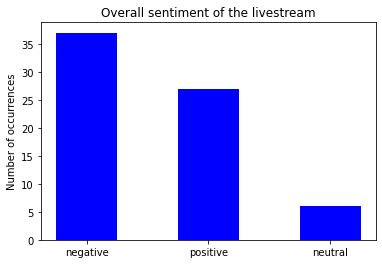

In [6]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time
from transformers import AutoTokenizer, AutoModelForSequenceClassification


#SENTIMENT ANALYSE

model_name = 'oliverguhr/german-sentiment-bert'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

X_train_german= all_messages


batch = tokenizer(X_train_german, padding=True, truncation=True, max_length = 512, return_tensors='pt')
batch = torch.tensor(batch['input_ids'])
#print(batch)

with torch.no_grad():
    outputs = model(batch)
    label_ids = torch.argmax(outputs.logits, dim=1)
    #print(label_ids)
    labels = [model.config.id2label[label_id] for label_id in label_ids.tolist()]
    #print(labels)


#Count the labels
count = Counter(labels)


#plot the number of times each sentiment occurs in a bar chart
def plot_counts(count):
    """
    Plot the number of times each sentiment occurs in a bar chart.
    """
    plt.bar(count.keys(), count.values(), width=0.5, color='blue')
    #make the graph look nicer
    plt.title('Overall sentiment of the livestream')
    
    plt.ylabel('Number of occurrences')
    
    #make the text bigger
    plt.show()



plot_counts(count)    

In [64]:
#REMOVE A CERTAIN COLUMN
today = time.strftime("%d-%m-%Y")
yesterday = time.strftime("%d-%m-%Y", time.localtime(time.time() - 86400))


import csv 

os.chdir('/Users/mnemo/Desktop/')

streamer = 'sudeldeckdudel'


def remove_column(file_name, column_index):
    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    with open(file_name, 'w') as f:
        writer = csv.writer(f)
        for row in data:
            del row[column_index]
            writer.writerow(row)


remove_column(f'{streamer}_{today}.csv', 3)


In [15]:
#ADD A COLUMN WITH THE STREAMER NAME
today = time.strftime("%d-%m-%Y")
yesterday = time.strftime("%d-%m-%Y", time.localtime(time.time() - 86400))
import csv


os.chdir('/Users/mnemo/Desktop/Twitch-chats')

streamer = 'xthesolutiontv'


def add_column(file_name, string):
   with open(file_name, 'r') as f:
       reader = csv.reader(f)
       data = list(reader)
   with open(file_name, 'w') as f:
       writer = csv.writer(f)
       #add a additional column with the title 'channel'
       for row in data:
           row.append(string)
           writer.writerow(row)

       
add_column(f'{streamer}_{today}.csv', streamer)





In [27]:
#rename and append a '1' to every file in this folder

os.chdir('/Users/mnemo/Desktop/store2')

for file in os.listdir():
    os.rename(file, f'{file[:-4]}2.csv')

In [16]:
#CONCATENATE ALL FILES IN THIS FOLDER

os.chdir('/Users/mnemo/Desktop/Twitch-chats/04-06-2022')

import pandas as pd
import time


streamer = 'orangemorange'


today = time.strftime("%d-%m-%Y")
yesterday = time.strftime("%d-%m-%Y", time.localtime(time.time() - 86400))



#concat three files csv files
df = pd.concat([pd.read_csv(f'{streamer}_04-06-2022.csv'), pd.read_csv(f'{streamer}_04-06-2022 Kopie.csv')])
#save the file to the desktop
df.to_csv(f'{streamer}_{today}.csv', index=False)

In [25]:
import time

today = time.strftime("%d-%m-%Y")
yesterday = time.strftime("%d-%m-%Y", time.localtime(time.time() - 86400))

print(today)

04-06-2022


In [111]:
#COUNTS THE NUMBER OF TOTAL ROWS IN A CSV FILE
import csv

streamer = 'derkioskoriginal'

os.chdir(f'/Users/mnemo/Desktop/')

count_rows = 0
with open(f'{streamer}_{today}.csv') as f:
    reader = csv.reader(f)
    #how many rows are in the file
    for row in reader:
        count_rows += 1

print(f'There are {count_rows} rows in the file.')

There are 662 rows in the file.


In [48]:
os.chdir('/Users/mnemo/Desktop/Twitch-chats')

#change the filename
#if there is a 2 in the name replace it with '_03-06-2022'

for file in os.listdir():
    if '2' in file:
        os.rename(file, f'{file[:-4]}_03-06-2022.csv')


In [66]:
#ADD A COLUMN WITH THE STREAMER NAME
os.chdir('/Users/mnemo/Desktop/Twitch-chats/03-06-2022')

streamer  = 'xthesolutiontv'

def add_column(file_name, string):
   with open(file_name, 'r') as f:
       reader = csv.reader(f)
       data = list(reader)
   with open(file_name, 'w') as f:
       writer = csv.writer(f)
       #add a additional column with the title 'channel'
       for row in data:
           row.append(string)
           writer.writerow(row)

       
add_column(f'{streamer}_{yesterday}.csv', streamer)

In [107]:

os.chdir('/Users/mnemo/Desktop/')
import csv

#count every from all the files in this folder
count_rows = 0
for file in os.listdir():
    with open(file) as f:
        reader = csv.reader(f)
        for row in reader:
            count_rows += 1

print(f'There are {count_rows} rows in the file.')            



      

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte

140374


In [24]:
os.chdir('/Users/mnemo/Desktop/store3')

#delete all files that are less than 5kb in size
for i in os.listdir():
    if os.path.getsize(i) < 10000:
        os.remove(i)